# ROC and AUC

### Introduction

So far, we have our classification metrics have been pased on absolute predictions of a 1 or a 0.  For example, accuracy is the total number of predictions correct out of the total predictions.  Then we broke down this error further into false positives and false negatives.

However, as we know, our logistic regression function not only predicts an absolute label, like a 1 or a 0, but also a probability of a positive event. So we would like a metric that captures this as well.  One metric that is often used is area under the curve, or ROC AUC.

### ROC

ROC AUC recognizes focuses on two metrics - the true positives rate and the false positive rate.  The true positive rate is just another word for recall:

* $ TPR = recall = \frac{TP}{TP + FN}$

> TPR or recall is  percentage of true positives over the total number of positive events.

The other measurement that ROC AUC depends on is the false positive rate.  

* $ FPR = \frac{FP}{TN + FN}$

> The false positive rate is the number of false positives over the total number of false events.

The receiver operating characteristic, or ROC, plots the true positive rate vs the false positive rate at various thresholds.

And the area under the curve, is the area under this this receiver operating characteristic.  The larger the area, the better the classifier ranks positive events above negative events.  Let's see this by way of example.

### Evaluating Separability

First, let's imagine that we have a classifier that perfectly ranks all of the observations.  That is, every observation with a true value of 1 is ranked higher than an observation with a true value of zero.

In [10]:
import pandas as pd
df_separated = pd.read_csv('./perfect_rank.csv', index_col = 0)
df_separated

,score,target
0,0.80,1
1,0.75,1
2,0.60,1
3,0.50,1
4,0.30,0
5,0.05,0


Now let's calculate the true positive rate and false positive rate for every threshold.  So first we'll have our threshold at .0, then at .10, then at .35, and so on.  So each time we update our threshold to classify one fewer point as positive.  And we calculate the TRP and FPR along the way.

This is what we get.

In [28]:
# FPR             TPR,
# FP/total negative   #TP/total positive
roc = [         # Threshold
    [2/2, 4/4], # .00 (predict all positive)
    [1/2, 4/4], 
    [0/2, 4/4], 
    [0/2, 3/4],
    [0/2, 2/4],
    [0/2, 1/4],
    [0/2, 0/4] # predict all negative
         ]

Now let's plot it.

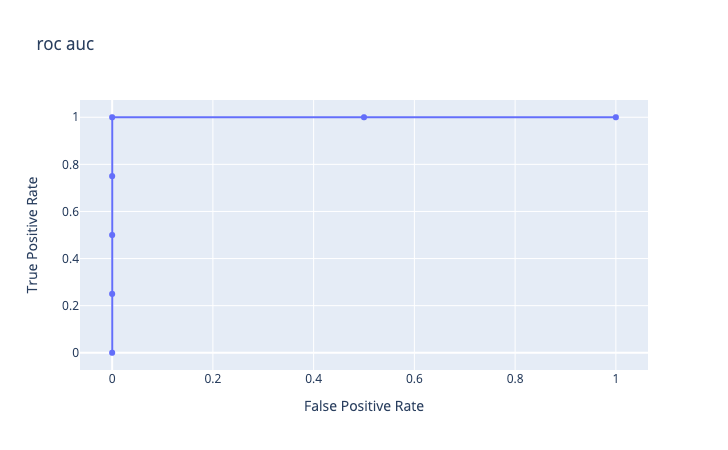

In [31]:
import plotly.graph_objects as go
x_vals = [pair[0] for pair in roc]
y_vals = [pair[1] for pair in roc]
scatter = go.Scatter(x = x_vals, y = y_vals)
go.Figure(scatter, layout = {'title': 'roc auc', 'xaxis': {'title': 'False Positive Rate'},
                             'yaxis': {'title': 'True Positive Rate'}
                            })

This area under the curve is 100 percent.  We start in the top left, with a threshold of .0, where we predict all as positive.  Then we are able to increase our threshold, and here, in doing so we maintain our high true positive rate while fully reducing our false positive rate.  Then because, we keep raising our threshold, we eventually reduce our true positive rate as well.

Now let's consider the case where our data is not perfectly ordered.

In [41]:
df_mixed = pd.read_csv('./mixed.csv', index_col = 0)
df_mixed

,score,target
0,0.80,1
1,0.75,1
2,0.60,0
3,0.50,1
4,0.30,0
5,0.05,0


As we can see from the above, we have an observed positive value with a lower score than an observed negative value.  Let's see what this does to the roc auc curve.

In [43]:
# FPR             TPR,
# FP/total negative   #TP/total positive


roc_2 = [         # Threshold
    [3/3, 3/3], # .00 (predict all positive)
    [2/3, 3/3], 
    [1/3, 3/3], 
    [1/3, 2/3],
    [0/3, 2/3],
    [0/3, 1/3],
    [0/3, 0/3] # predict all negative
         ]

This time, plotting the curve, we get the following:

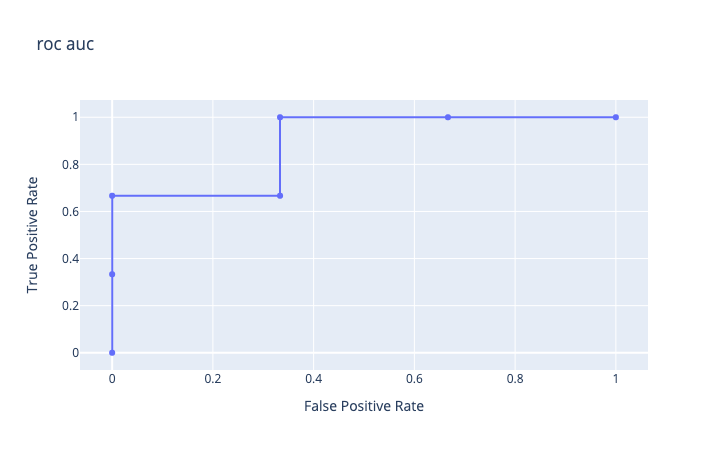

In [46]:
x_vals = [pair[0] for pair in roc_2]
y_vals = [pair[1] for pair in roc_2]
scatter = go.Scatter(x = x_vals, y = y_vals)
go.Figure(scatter, layout = {'title': 'roc auc', 'xaxis': {'title': 'False Positive Rate'},
                             'yaxis': {'title': 'True Positive Rate'}
                            })

### Interpreting ROC AUC

We can see from the above that ROC AUC measures how well our data is sorted.  Whenever to decrease the false positive rate, we also must decrease the true positive rate, this is the mark of a non-event with a higher score than a true event.

In fact, the AUC measure is equal to the percentage of ranking pairs that are correct.  Let's see this by again looking at our mixed set of data.

In [47]:
df_mixed = pd.read_csv('./mixed.csv', index_col = 0)
df_mixed

,score,target
0,0.80,1
1,0.75,1
2,0.60,0
3,0.50,1
4,0.30,0
5,0.05,0


Above, pairing each positive event with each of the three negative events there are nine pairs of data.  Starting with the first two positive events at index 0 and 1, we can see that they are both ranked higher than all of the negative events.  But then we can see that the last positive event is only ranked higher than 2 of 3 of the negative events.  So eight of nine pairings are correct.  And this is equal to the AUC for that data.

In [56]:
8/9

0.8888888888888888

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(df_mixed.target, df_mixed.score)

0.888888888888889

### Plotting Area Under the Curve

In [15]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
from sklearn.linear_model import LogisticRegression
n_feats = 1

model = LogisticRegression(solver = 'sag', max_iter= 5000)
model.fit(X_train.iloc[:, :n_feats], y_train)
model.score(X_test.iloc[:, :n_feats], y_test)

scores = model.predict_proba(X_test.iloc[:, :n_feats])[:, 1]

In [50]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)

[Text(0, 0.5, 'tpr'), Text(0.5, 0, 'fpr')]

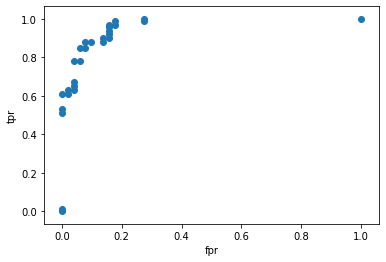

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(fpr, tpr)
ax.set(xlabel = 'false positive rate', ylabel = 'true positive rate')

And we can calculate area under the curve, with the following:

In [52]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.9671781756180733

The area under curve metric summarize the skill of a model across various thresholds.

### Resources

[Machine learning mastery](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

> Notice we label this as true positive rate and false positive rate.  The true positive rate is the same thing as recall.  It's the percentage of positives vs all positives in the dataset.  

> The false positive rate is the percentage of false positives (incorrect positive predictions) vs the total number of negative predictions.

ROC AUC can be interpreted as calculating the number of these misorderings of rankings.

> OR the share of correctly ranked pairs.

<img src="./roc-auc-ml.png" width="40%">

Lift: 
   * Look at the top k values 

$\frac{y_{top_k}}{y_{total}}$

y total, or y sample

So we'll find 4 times more churned people then if we just randomly called individuals.